# CNN practice

1. simple CNN
2. deep CNN
3. ?
4. ?
5. ensemble
6. low memory

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

from mnist import MNIST

2023-07-03 15:42:14.653244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 15:42:14.781454: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-03 15:42:15.418833: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda/extras/CUPTI/:/usr/local/cuda-11.7/lib64:/u

# Load Image

In [2]:
mndata = MNIST('../data/mnist/')

train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

train_images = np.array(train_images).reshape((-1, 28, 28, 1))
train_labels = np.array(train_labels)
test_images = np.array(test_images).reshape((-1, 28, 28, 1))
test_labels = np.array(test_labels)

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

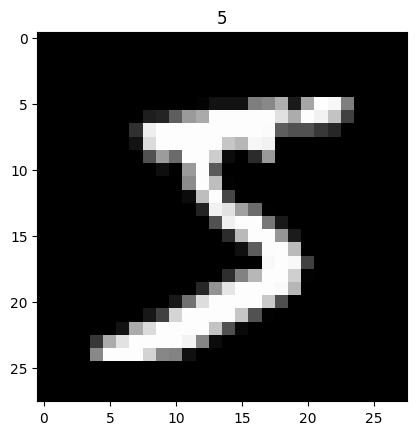

In [3]:
idx = 0

plt.title(train_labels[0])
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [4]:
train_labels_1hot = tf.one_hot(train_labels, 10)
test_labels_1hot = tf.one_hot(test_labels, 10)

train_labels_1hot.shape, test_labels_1hot.shape

2023-07-03 15:42:20.699598: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-03 15:42:20.699864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-03 15:42:20.733860: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-03 15:42:20.785411: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-03 15:42:20.785604: I tensorflow/compiler/xla/stream_executo

(TensorShape([60000, 10]), TensorShape([10000, 10]))

# Simple CNN

5 layers (last FC-10)

In [5]:
def SimpleCNN(input_size, output_size, dropout_rate):
    inputs = tf.keras.layers.Input(input_size)
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='SAME')(inputs)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='SAME')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='SAME')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(units=4096, activation='relu')(x)
    x = tf.keras.layers.Dense(units=4096, activation='relu')(x)
    x = tf.keras.layers.Dense(units=output_size, activation='softmax')(x)

    model = tf.keras.Model(inputs, x)
    return model

In [6]:
cnn_model = SimpleCNN((28, 28, 1), 10, 0.01)
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                         

In [7]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')

In [8]:
history = cnn_model.fit(train_images, train_labels_1hot, validation_split=0.2, batch_size=100, epochs=20)

Epoch 1/20


2023-07-03 15:42:24.608212: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-07-03 15:42:25.667662: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2023-07-03 15:42:26.388602: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fb4580f6690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-03 15:42:26.388819: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla V100S-PCIE-32GB, Compute Capability 7.0
2023-07-03 15:42:26.388843: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): Tesla V100S-PCIE-32GB, Compute Capability 7.0
2023-07-03 15:42:26.396017: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reprod

480/480 [==============================] - 8s 7ms/step - loss: 1.5344 - acc: 0.9030 - val_loss: 0.1129 - val_acc: 0.9669
Epoch 2/20
480/480 [==============================] - 3s 6ms/step - loss: 0.0883 - acc: 0.9724 - val_loss: 0.0719 - val_acc: 0.9782
Epoch 3/20
480/480 [==============================] - 3s 6ms/step - loss: 0.0604 - acc: 0.9819 - val_loss: 0.0599 - val_acc: 0.9805
Epoch 4/20
480/480 [==============================] - 3s 6ms/step - loss: 0.0507 - acc: 0.9842 - val_loss: 0.0629 - val_acc: 0.9831
Epoch 5/20
480/480 [==============================] - 3s 6ms/step - loss: 0.0448 - acc: 0.9857 - val_loss: 0.0683 - val_acc: 0.9827
Epoch 6/20
480/480 [==============================] - 3s 6ms/step - loss: 0.0438 - acc: 0.9866 - val_loss: 0.0546 - val_acc: 0.9856
Epoch 7/20
480/480 [==============================] - 3s 6ms/step - loss: 0.0332 - acc: 0.9898 - val_loss: 0.0569 - val_acc: 0.9855
Epoch 8/20
480/480 [==============================] - 3s 6ms/step - loss: 0.0364 - acc:

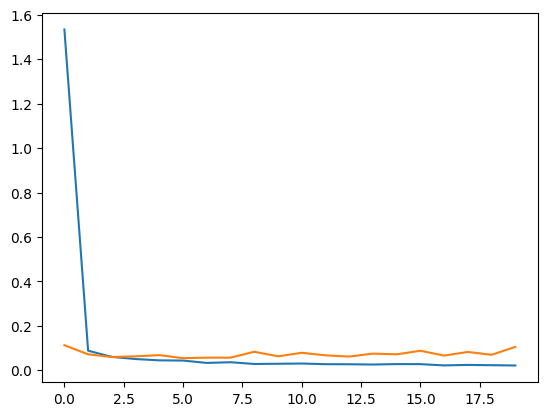

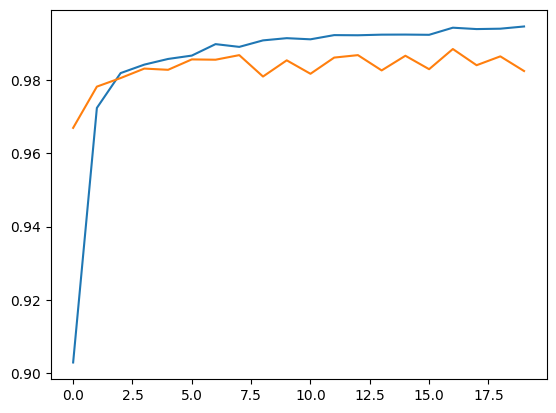

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()